# LCPB 20-21 exercise 4

### Saverio Monaco

### Gerardo Carmona

### Hilario Capettini

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from itertools import cycle, islice

In [8]:
def cl_scatter3d(xdata,ydata,view1=10,view2=100,title = False):
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                                    int(max(ydata) + 1))))
    fig, (ax1) = plt.subplots(figsize=(10, 10))
    ax1 = plt.axes(projection='3d')
    ax1.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax1.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax1.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax1.set_yticklabels([])
    ax1.set_xticklabels([])
    ax1.set_zticklabels([])
    #ax1.view_init(view1, view2)
    if title:
        ax1.set_title(title)
    ax1.scatter3D(xdata[:,0], xdata[:,1], xdata[:,2],color=colors[y]);

In [9]:
data = np.loadtxt('./DATA/data_t-SNE_310101_d5_R100_e1_N800.dat',delimiter='\t')
data_size = np.shape(data)[0]

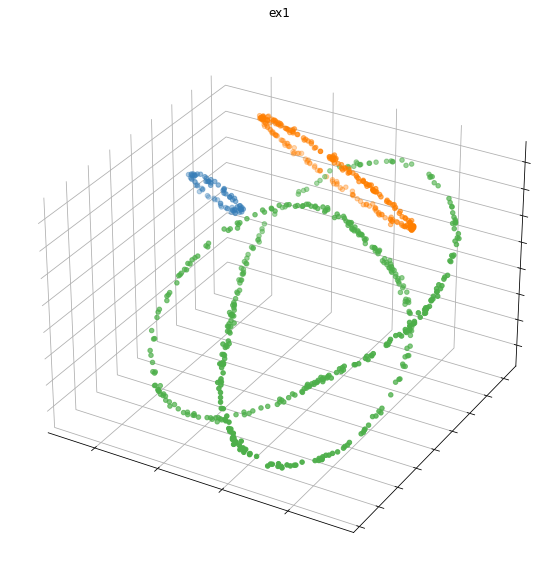

In [10]:
y = []
for i in range(int(data_size/10)):
    y.append(0)

for i in range(int(data_size*3/10)):
    y.append(1)

for i in range(int(data_size*6/10)):
    y.append(2)
cl_scatter3d(data,y,title='ex1')

## 2

class sklearn.manifold.TSNE(n_components=2, *, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0, random_state=None, method='barnes_hut', angle=0.5, n_jobs=None, square_distances='legacy')

In [14]:
def tsne_2(x,perplexity):
    X = TSNE(n_components=2,perplexity=perplexity).fit_transform(x)
    X.shape
    return X

TypeError: unhashable type: 'list'

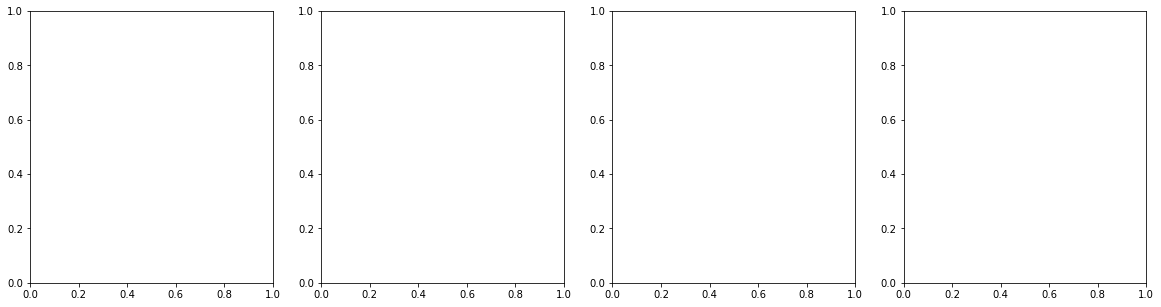

In [20]:
c = {0: 'blue',1:'red',2:'forestgreen'}

fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

x = tsne_2(data,5)
ax1.scatter(x[:,[0]],x[:,[1]],color=c[y[:]])
ax1.set_title('Perplexity = 5')

x = tsne_2(data,30)
ax2.scatter(x[:,[0]],x[:,[1]],color=c[y[:]])
ax2.set_title('Perplexity = 30')

x = tsne_2(data,50)
ax3.scatter(x[:,[0]],x[:,[1]],color=c[y[:]])
ax3.set_title('Perplexity = 50')

x = tsne_2(data,100)
ax4.scatter(x[:,[0]],x[:,[1]],color=c[y[:]])
ax4.set_title('Perplexity = 100')

